In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

## Probabilidades

_La matemática es la lógica de la certeza mientras que la probabilidad es la lógica de la incerteza_, dice Joseph K. Blitzstein condensando el pensamiento de cientos de personas antes que el. Entender como pensar en presencia de incertezas es central en Ciencia de Datos. Esta incerteza proviene de diversas fuentes, incluyendo datos incompletos, errores de medición, límites de los diseños experimentales, dificultad de observar ciertos eventos, aproximaciones, etc.

En este capítulo veremos una introducción breve a algunos conceptos centrales en probabilidad que nos dará el lenguaje para comprender mejor los fundamentos de varios métodos y procedimientos que veremos más adelante, para quienes tengan interés en profundizar en el tema recomiendo leer el libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein y Jessica Hwang.

Empecemos por el concepto de _probabilidad_, existen al menos tres grandes _definiciones_ de probabilidad:

* Decimos que una moneda tiene probabilidad 0,5 (o 50%) de caer cara, por que asumimos que ninguno de los dos eventos, {cara, ceca}, tiene preferencia sobre el otro. Es decir, pensamos que ambos eventos son equi-probables. Esto se conoce como definición clásica o naíf. Es la misma que usamos para decir que la probabilidad de obtener 3 al arrojar un dado es de $\frac{1}{6}$, o que la probabilidad de tener una hija es de 0,5. Esta definición se lleva a las patadas con preguntas como ¿Cuál es la probabilidad de existencia de vida en Marte?, claramente 0,5 es una sobreestimación, ya que el evento _vida_ y el evento _no-vida_ no son igualmente probables.

* Otra forma de ver a una probabilidad es bajo el prisma frecuentista. En esta concepción de probabilidad, en vez de asumir que los eventos son igualmente probables, diseñamos un experimento (en el sentido amplio de la palabra) y contamos cuantas veces observamos el evento que nos interesa $x$ respecto del total de intentos $n$. Entonces podemos aproximar la probabilidad mediante la frecuencia relativa $\frac{n_x}{n}$, según este procedimiento la probabilidad de obtener 3 al arrojar un dado no es necesariamente de $\frac{1}{6}$ si no que bien podría ser $\frac{1}{3}$. Esta noción de probabilidad se suele asociar con la idea de la existencia de un número _correcto_ al que nos aproximamos a medida que aumentan los intentos $n$. Por lo tanto, podemos definir formalmente probabilidad como:

$$p(x) = \lim_{n \rightarrow \infty} \frac{n_x}{n}$$

La definición frecuentista de probabilidad tiene el inconveniente de no ser muy útil para pensar en problemas que ocurren una sola vez. Por ejemplo, ¿Cuál es la probabilidad que mañana llueva? Estrictamente solo hay un mañana y o bien lloverá o bien no. Los frecuentistas suelen evadir este problema recurriendo a experimentos imaginarios. En ese caso podríamos intentar estimar la probabilidad de lluvia para mañana imaginando que hay una cantidad muy grande de _mañanas_ y luego contando en cuantos de esos _mañanas_ llueve y en cuantos no. Esta _ficción científica_ es perfectamente válida y muy útil.

* La tercer forma de pensar una probabilidad se refiere a cuantificar la incertidumbre que tenemos sobre la posibilidad que un evento suceda. Si el evento es imposible entonces la probabilidad de ese evento será exactamente 0, si en cambio el evento sucede siempre entonces la probabilidad de ese evento será de 1. Todos los valores intermedios reflejan grados de certeza/incerteza. Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea $x$ kg, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca. Esta tercer interpretación del concepto de probabilidad es llamado Bayesiana y se puede pensar como una versión que incluye, como casos especiales, a las definiciones frecuentista y clásica.

Independientemente de la interpretación del concepto de **probabilidad** la teoría de probabilidades nos ofrece un marco único, coherente y riguroso para trabajar con probabilidades.

## Probabilidades y conjuntos

El marco matemático para trabajar con las probabilidades se construye alrededor de los conjuntos matemáticos. 

El espacio muestral $\mathcal{X}$ es el conjunto de todos los posibles resultados de un experimento. Un evento $A$ es un subconjunto de $\mathcal{X}$. Decimos que $A$ ha ocurrido si al realizar un _experimento_ obtenemos como resultado $A$. Si tuviéramos un típico dado de 6 caras tendríamos que:

$$\mathcal{X} = \{1, 2, 3, 4, 5, 6\}$$

Podemos definir al evento $A$ como:

$$A = \{2\}$$

Si queremos indicar la probabilidad de que $A$ ocurra escribimos $P(A=2)$, es común usar una forma abreviada, simplemente $P(A)$. Recordemos que esta probabilidad no tiene por que ser $\frac{1}{6}$. Es importante notar que podriamos haber definido al evento $A$ usando más de un elemento de $\mathcal{X}$, por ejemplo cualquier número impar (siempre dentro de $\mathcal{X}$) $A = \{1, 3, 5\}$, o tal vez $A = \{4,5,6\}$, todo dependerá del problema que tengamos interés en resolver.

Entonces, tenemos que los eventos son subconjuntos de un espacio muestral definido y las probabilidades son números  asociados a la posibilidad que esos eventos ocurran, ya sea que esa "posibilidad" la definamos:

1. a partir de asumir todos los eventos equiprobables
2. como la fracción de eventos favorables respecto del total de eventos
3. como el grado de certeza de obtener tal evento

## Axiomas de Kolmogorov

Una aproximación a la formalización del concepto de probabilidad son los axiomas de Kolmogorov. Esta no es la única vía, una alternativa es el [teorema de Cox](https://en.wikipedia.org/wiki/Cox%27s_theorem) que suele ser preferida por quienes suscriben a la definición Bayesiana de probabilidad. Nosotros veremos los axiomas de Kolmogorov por ser los más comúnmente empleados, pero es importante aclarar que ambas aproximaciones conducen, esencialmente, al mismo marco probabilístico.

1. La probabilidad de un evento es un número real mayor o igual a cero
    $$P(A)\in \mathbb {R} ,P(A)\geq 0\qquad \forall A \in \mathcal{X}$$

2. La probabilidad que algo ocurra es 1, queda implícito que todo lo que puede suceder está contenido en $\mathcal{X}$
    $$P(\mathcal{X}) = 1$$

3. Si los eventos $A_1, A_2, ..., A_j$ son mutuamente excluyentes entonces

$$P(A_1 \cup A_2 \cup \cdots A_j) = \bigcup _{i=1}^{j}P(A_{i}) = \sum _{i=1}^{j}P(A_{i})$$



Si obtengo un 1 en un dado no puedo obtener simultaneamente otro número, por lo tanto la probabilidad de obtener, por ej 1 o 3, o 6 es igual $P(1) + P(3) + P(6)$

De estos tres axiomas se desprende que las probabilidades están restringidas al intervalo [0, 1], es decir números que van entre 0 y 1 (incluyendo ambos extremos).

## Probabilidad condicional

Dado dos eventos $A$ y $B$ siendo $P(B) > 0$, la probabilidad $A$ dado $B$, que se simboliza como $P(A \mid B)$ Es definida como:

$$P(A \mid B) = \frac{P(A, B)}{P(B)}$$ 


$P(A, B)$ es la probabilidad que ocurran los eventos $A$ y $B$, también se suele escribir como $P(A \cap B)$ (el símbolo $\cap$ indica intersección de conjuntos), la probabilidad de la intersección de los eventos $A$ y $B$.

$P(A \mid B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra el evento A condicionada por el hecho que sabemos que B ha ocurrido. Por ejemplo la probabilidad que una vereda esté mojada es diferente de la probabilidad que tal vereda esté mojada dado que está lloviendo. 

Una probabilidad condicional se puede vizualizar como la reducción del espacio muestral. Para ver esto de forma más clara vamos a usar una figura adaptada del libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein & Jessica Hwang. En ella se puede ver como pasamos de tener los eventos $A$ y $B$ en el espacio muestral $\mathcal{X}$, en el primer cuadro, a tener $P(A \mid B)$ en el último cuadro donde el espacio muestral se redujo de $\mathcal{X}$ a $B$. 

<center>
<img src='imagenes/cond.png' width=500 >
</center>

El concepto de probabilidad condicional está en el corazón de la estadística y es central para pensar en como debemos actualizar el conocimiento que tenemos de un evento a la luz de nuevos datos, veremos más sobre esto en el curso "Análisis Bayesiano de datos" y en "Aprendizaje automático y minería de datos". Por ahora dejamos este tema con la siguiente aclaración. Todas las probabilidades son condicionales (respecto de algún supuesto o modelo) aún cuando no lo expresemos explícitamente, no existen probabilidades sin contexto.

### Variables aleatorias discretas y distribuciones de probabilidad

Una variable aleatoria es una función que asocia numéros reales $\mathbb{R}$ con un espacio muestral. Podríamos definir entonces una variable aleatoria $C$ cuyo espacio muestral es $\{rojo, verde, azul\}$. Si los eventos de interés fuesen `rojo, verde, azul,` entonces podríamos _codificarlos_ de la siguiente forma:

`C(rojo) = 0, C(verde)=1, C(azul)=2`

Esta _codificación_ es útil ya que en general es más facil operar con números que con _strings_, ya sea que las operaciones las hagamos manualmente o con una computadora.

Una variable es aleatoria en el sentido de que en cada _experimento_ es posible obtener un evento distinto sin que la sucesión de eventos siga un patrón determinista. Por ejemplo si _preguntamos_ cual es el valor de $C$ tres veces seguida podríamos obtener, `rojo, rojo, azul` o quizá `azul, verde, azul`, etc. Es importante destacar que la variable NO puede tomar cualquier posible, en nuestro ejemplo solo son posibles 3 valores.

Otra confusión muy común es creer que _aleatorio_ implica que todos los eventos tienen igual probabilidad. Pero esto no es cierto, bien podría darse el siguiente ejemplo:

$$P(C=rojo) = \frac{1}{2}, P(C=verde) = \frac{1}{4}, P(C=azul) = \frac{1}{4}$$

La equiprobabilidad de los eventos es solo un caso especial.

Prácticamente la totalidad de los problemas de interés requiere lidiar con solo dos tipos de variables aleatorias: 

* Discretas
* Continuas 

Una variable aleatoria discreta es una variable que puede tomar valores discretos, los cuales forman un conjunto finito (o infinito [numerable](https://es.wikipedia.org/wiki/Conjunto_numerable)). En nuestro ejemplo $C$ es discreta ya que solo puede tomar 3 valores, sin posibilidad de valores intermedios entre ellos, no es posible obtener el valor _verde-rojizo_!

Si en vez de "rótulos" hubiéramos usado el espectro _continuo_ de longitudes onda _visibles_ otro sería el caso, ya que podríamos haber definido a $C=\{400 \text{ nm} ... 750\text{ nm}\}$  y en este caso no hay dudas que sería posible obtener un valor _a mitad de camino_ entre _rojo_ ($\approx 700 \text{ nm}$) y _verde_ ($\approx 530 \text{ nm}$), de hecho podemos encontrar infinitos valores entre ellos. Este sería el ejemplo de una variable aleatoria continua.

Una variable aleatoria tiene una _lista_ asociada con la probabilidad de cada evento. El nombre formal de esta _lista_ es disribución de probabilidad, en el caso particular de variables aleatorias discretas se le suele llamar también función de masa de probabilidad (o **pmf** por su sigla en inglés). Es importante destacar que la $pmf$ es una función que devuelve probabilidades, por lo tanto siempre obtendremos valores comprendidos entre [0, 1] y cuya suma total (sobre todos los eventos) dará 1.

En principio nada impide que uno defina su propia distribución de probabilidad. Pero existen algunas distribuciones de probabilidad tan comúnmente usadas que tienen nombre "propio" por lo que conviene saber que existen. El siguiente listado no es exhaustivo ni tiene como propósito que _memoricen_ las distribuciones y sus propiedades, solo que ganen cierta familiaridad con las mismas. Si en el futuro necesitan utilizar alguna $pmf$ pueden volver a esta _notebook_ (o pueden revisar Wikipedia!!!)

En las siguientes gráficas la altura de las barras naranja indican la probabilidad de cada valor de $x$. Se indican, además, la media ($\mu$) y desviación estándar ($\sigma$) de las distribuciones, es importante destacar que estos valores NO son calculados a partir de _datos_  si no que son los valores exactos (calculados analíticamente) que le corresponden a cada distribución.

#### Distribución uniforme discreta

Es una [distribución](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) que asigna igual probabilidad a un conjunto finitos de valores, su $pmf$ es:

$$p(k \mid a, b)={\frac {1}{b - a}}$$

Para valores de $k$ en el intervalo [a, b], fuera de este intervalo $p(k) = 0$

Podemos usar esta distribución para modelar, por ejemplo un dado no cargado.

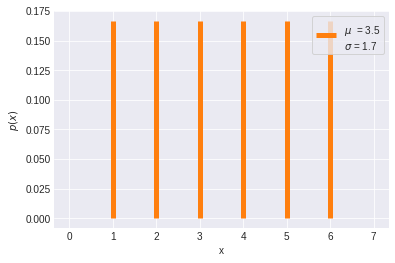

In [2]:
distri = stats.randint(1, 7)  # límite inferior, límite superior + 1
x = np.arange(0, 8)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los "x"
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C1', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                                 float(varianza)**0.5))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución binomial

Es la [distribución](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre sí, con una probabilidad fija $p$ de ocurrencia del éxito entre los ensayos.
Cuando $n=1$ esta distribución se reduce a la distribución de Bernoulli.

$$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

El término $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ éxitos en $n$ intentos. Este término solo tiene en cuenta el número total de éxitos obtenidos pero no la secuencia en la que aparecieron. El primer término conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el número de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

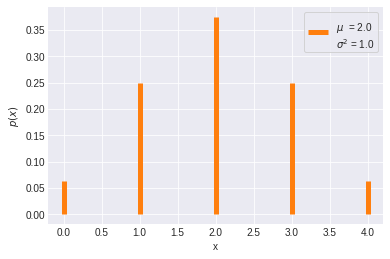

In [3]:
n = 4  # número de intentos
p = 0.5  # probabilidad de "éxitos"
distri = stats.binom(n, p)  
x = np.arange(0, n + 1)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C1', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media),
                                                                 float(varianza**0.5)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución de Poisson

Es una [distribución](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $x$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades pequeñas (sucesos _raros_) como accidentes de tráfico o decaimiento radiactivo.

$$
p(x \mid \mu) = \frac{\mu^{x} e^{-\mu}}{x!}
$$

Tando la media como la varianza de esta distribución están dadas por $\mu$. 

A medida que $\mu$ aumenta la distribución de Poisson se aproxima a una distribución Gaussiana (aunque sigue siendo discreta). La distribución de Poisson tiene estrecha relación con otra distribución de probabilidad, la binomial. Una distribución binomial puede ser aproximada con una distribución de Poisson, cuando $n >> p$, es decir, cuando la cantidad de "éxitos" ($p$) es baja respecto de la cantidad de "intentos" (p) entonces $Poisson(np) \approx Binon(n, p)$.  Por esta razón la distribución de Poisson también se conoce como "ley de los pequeños números" o "ley de los eventos raros". Ojo que esto no implica que $\mu$ deba ser pequeña, quien es pequeño/raro es $p$ respecto de $n$.

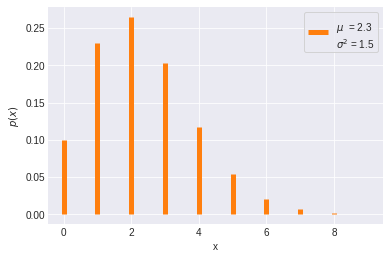

In [4]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x = np.arange(0, 10)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.vlines(x,  0, x_pmf, colors='C1', lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma^2$ = {:3.1f}'.format(float(media),
                                                                 float(varianza**0.5)))
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

### Variables aleatorias y distribuciones de probabilidad continuas

Hasta ahora hemos visto variables aleatorias discretas y distribuciones de masa de probabilidad. Existe otro tipo de variable aleatoria que es muy usado y son las llamadas variables aleatorias continuas, ya que toman valores en $\mathbb{R}$.

La diferencia más importante entre variables aleatoria discretas y continuas es que para las continuas $P(X=x) = 0$, es decir, la probabilidad de cualquier valor es exactamente 0.

En las gráficas anteriores, para variables discretas, es la altura de las lineas lo que define la probabilidad de cada evento. Si sumamos las alturas siempre obtenemos 1, es decir la suma total de las probabilidades. En una distribución continua no tenemos _lineas_ si no que tenemos una curva continua, la altura de esa curva es la _densidad de probabilidad_. Si queremos averiguar cuanto más probable es el valor $x_1$ respecto de $x_2$ basta calcular:

$$\frac{pdf(x_1)}{pdf(x_2)}$$

Donde $pdf$ es la función de densidad de probabilidad (por su sigla en inglés). Y es análoga a la $pmf$ que vimos para variables discretas. Una diferencia importante es que la $pdf(x)$ puede ser mayor a 1. Para obtener una probabilidad a partir de una pdf debemos integrar en un intervalo dado, ya que es el área bajo la curva y no la altura lo que nos da la probabilidad, es decir es esta integral la que debe dar 1.

$$P(a \lt X \lt b) =  \int_a^b pdf(x) dx$$

En muchos textos es común usar $p$ para referirse a la probabilidad de un evento en particular o a la $pmf$ o a la $pdf$, esperando que la diferencia se entienda por contexto.

A continuación veremos varias distribuciones continuas. La curva azul representa la $pdf$, mientras que el histograma (en naranja) representan muestras tomadas a partir de cada distribución. Al igual que con los ejemplos anteriores de distribuciones discretas. Se indican la media ($\mu$) y desviación estándar ($\sigma$) de las distribuciones, también en este caso recalcamos que estos valores NO son calculados a partir de _datos_ si no que son los valores exactos (calculados analíticamente) que le corresponden a cada distribución.

#### Distribución uniforme

Aún siendo simple, la distribución [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estadística, por ej para representar nuestra ignorancia sobre el valor que pueda tomar un parámetro. La distribución uniforme tiene entropía cero (todos los estados son igualmente probables).

$$
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  \text{para el resto} \end{cases}
$$

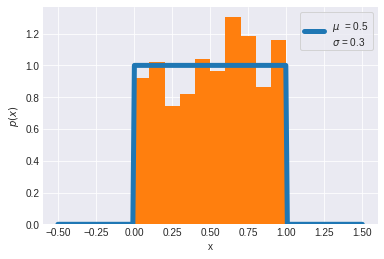

In [5]:
distri = stats.uniform(0, 1)  # distribución uniforme entre a=0 y b=1
x = np.linspace(-0.5, 1.5, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
          label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                              float(varianza)**0.5))
plt.hist(x_rvs, density=True)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución Gaussiana (o normal)

Es quizá la [distribución](https://en.wikipedia.org/wiki/Normal_distribution) más conocida. Por un lado por que muchos fenómenos pueden ser descriptos (aproximadamente) usando esta distribución. Por otro lado por que posee ciertas propiedades matemáticas que facilitan trabajar con ella de forma analítica. Es por ello que muchos de los resultados de la estadística frecuentista se basan en asumir una distribución Gaussiana.

La distribución Gaussiana queda definida por dos parámetros, la media $\mu$ y la desviación estándar $\sigma$. Una distribución Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribución Gaussiana estándar_.

$$
p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}}
$$

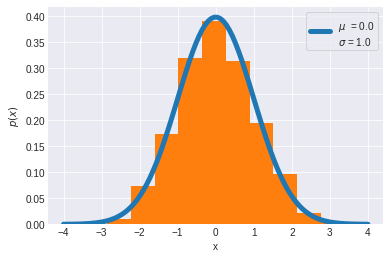

In [6]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviación standard 1
x = np.linspace(-4, 4, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
          label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                              float(varianza)**0.5))
plt.hist(x_rvs, density=True)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución t de Student

Históricamente esta [distribución](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgió para estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. En estadística Bayesiana su uso más frecuente es el de generar modelos robustos a datos aberrantes.


$$p(x \mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}}
$$

donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un parámetro llamado _grados de libertad_ en la mayoría de los textos aunque también se le dice _grado de normalidad_, ya que a medida que $\nu$ aumenta la distribución se aproxima a una Gaussiana. En el caso extremo de $\lim_{\nu\to\infty}$ la distribución es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribución de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teoría esta distribución no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribución de Cauchy, la dispersión alrededor de la media será alta y esta dispersión no disminuirá a medida que aumente el tamaño de la muestra. La razón de este comportamiento extraño es que en distribuciones como la Cauchy están dominadas por lo que sucede en las colas de la distribución, contrario a lo que sucede por ejemplo con la distribución Gaussiana.

Para esta distribución $\sigma$ no es la desviación estándar, que como ya se dijo podría estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviación estándar de una distribución Gaussiana.

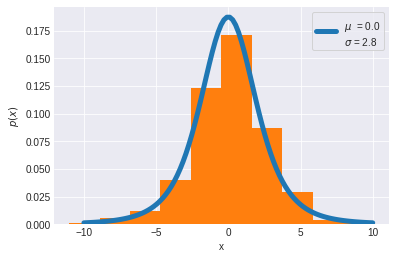

In [7]:
distri = stats.t(loc=0, scale=2, df=4) # media 0, escala 2, grados de libertad 4
x = np.linspace(-10, 10, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
          label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                              float(varianza)**0.5))
plt.hist(x_rvs, density=True)
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución exponencial

La distribución [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribución se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El número de tales eventos para un tiempo fijo lo da la distribución de Poisson.

$$
p(x \mid \lambda) = \lambda e^{-\lambda x}
$$

La media y la desviación estándar de esta distribución están dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrización  diferente donde la escala es igual a $\frac{1}{\lambda}$

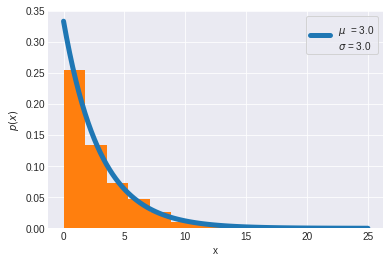

In [8]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x = np.linspace(0, 25, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
          label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                              float(varianza)**0.5))
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución de Laplace

También llamada distribución [doble exponencial](https://en.wikipedia.org/wiki/Laplace_distribution), ya que puede pensarse como una distribucion exponencial "más su imagen especular". Esta distribución surge de medir la diferencia entre dos variables exponenciales (idénticamente distribuidas). 

$$p(x \mid \mu, b) = \frac{1}{2b} \exp \left\{ - \frac{|x - \mu|}{b} \right\}$$


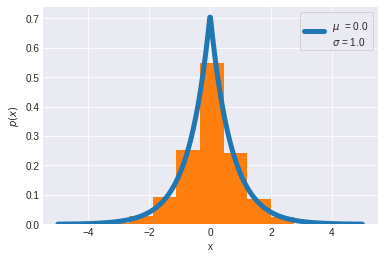

In [9]:
distri = stats.laplace(0, 0.7)  # escala 3, lambda = 1/3
x = np.linspace(-5, 5, 500)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
          label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media),
                                                               float(varianza)**0.5))
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución beta

Es una [distribución](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es útil para modelar proporciones o porcentajes. 

$$
p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1}
$$

El primer término es simplemente una constante de normalización que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribución beta se reduce a la distribución uniforme.

Si queremos expresar la distribución beta en función de la media y la dispersión alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una parámetro llamado concentración a media que $\kappa$ aumenta la dispersión disminuye. Notese, además que $\kappa = \alpha + \beta$.

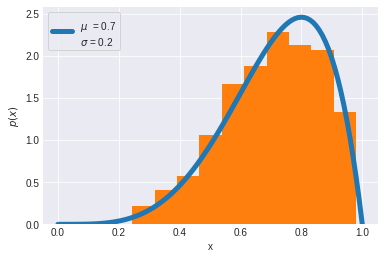

In [10]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x = np.linspace(0, 1, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
          label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media), 
                                                               float(varianza)**0.5))
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución Gamma

Scipy parametriza a la distribución [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un parámetro $\alpha$ y uno $\theta$, usando estos parámetros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}}
$$

Una parametrización más común en estadística Bayesiana usa los parámetros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}
$$


La distribución gamma se reduce a la exponencial cuando $\alpha=1$.

/home/osvaldo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


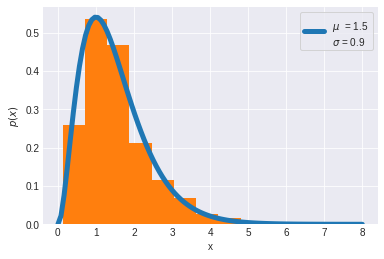

In [11]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x = np.linspace(0, 8, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribución
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=5,
           label='$\mu$  = {:3.1f}\n$\sigma$ = {:3.1f}'.format(float(media), 
                                                               float(varianza)**0.5))
plt.hist(x_rvs, normed=True)

plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend(frameon=True);

#### Distribución acumulada

La $pdf$ (o la $pmf$) son formas comunes de representar y trabajar con variables aleatorias, pero no son las únicas formas posibles. Existen otras representaciones equivalentes. Por ejemplo la función de distribución acumulada ($cdf$ en inglés). Al integrar una $pdf$ se obtiene la correspondiente $cdf$, y al derivar la $cdf$ se obtiene la $pdf$.


La integral de la $pdf$ es llamada función de distribución acumulada ($cdf$):

\begin{equation}
cdf(x) = \int_{-\infty}^{x} pdf(x) d(x)
\end{equation}

En algunas situaciones se prefiere hablar de la función de supervivencia:

\begin{equation}
S(x) = 1 - cdf 
\end{equation}


A continuación un ejemplo de la $pdf$ y $cdf$ para 4 distribuciones de la familia Gaussiana.

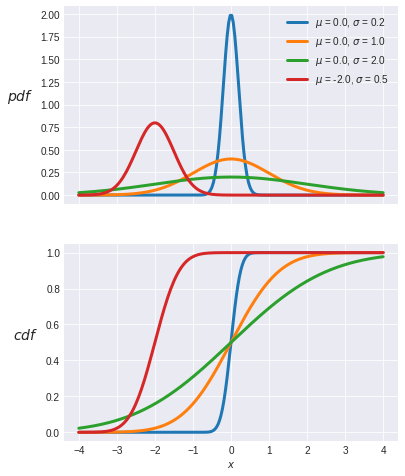

In [12]:
_, ax = plt.subplots(2,1, figsize=(6, 8), sharex=True)
x_values = np.linspace(-4, 4, 200)
values = [(0., .2), (0., 1.), (0., 2.), (-2., .5)]
color = ['C0', 'C1', 'C2', 'C3']
for val, c in zip(values, color):
    pdf = stats.norm(*val).pdf(x_values)
    cdf = stats.norm(*val).cdf(x_values)
    ax[0].plot(x_values, pdf, lw=3, color=c,
               label='$\mu$ = {}, $\sigma$ = {}'.format(*val))
    ax[1].plot(x_values, cdf, lw=3, color=c)
ax[0].set_ylabel('$pdf$', fontsize=14, rotation=0, labelpad=20)
ax[0].legend()
ax[1].set_ylabel('$cdf$', fontsize=14, rotation=0, labelpad=20)
ax[1].set_xlabel('$x$');


La siguiente figura tomada del libro [Think Stats](http://greenteapress.com/thinkstats2/html/index.html) resume las relaciones entre la $cdf$, $pdf$ y $pmf$.

<img src='imagenes/cmf_pdf_pmf.png' width=600 >

## Distribuciones empíricas versus teóricas

Un método gráfico para comparar si un conjunto de datos se ajusta a una distribución teórica es comparar los valores esperados de la distribución teórica en el eje $x$ y en el eje $y$ los valores de los datos ordenados de menor a mayor. Si la distribución empírica fuese exactamente igual a la teórica los puntos caerían sobre la linea recta a $45^{\circ}$, es decir la linea donde $y = x$.

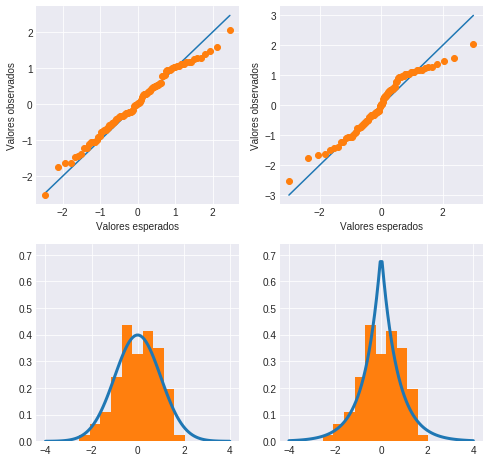

In [13]:
muestra = np.random.normal(0, 1, 100)
dist = stats.norm(0, 1), stats.laplace(scale=0.7)
x = np.linspace(-4, 4, 100)
dist_pdf = dist[0].pdf(x), dist[1].pdf(x)


_, ax = plt.subplots(2, 2, figsize=(8, 8))
for i in range(2):
    osm, osr = stats.probplot(muestra, fit=False, dist=dist[i])
    ax[0,i].plot(osm, osm)
    ax[0,i].plot(osm, osr, 'o')
    ax[0,i].set_xlabel('Valores esperados')
    ax[0,i].set_ylabel('Valores observados')
    ax[1, i].plot(x, dist_pdf[i], lw=3)
    ax[1, i].hist(muestra, density=True)
    ax[1, i].set_ylim(0, np.max(dist_pdf) * 1.1)

## Límites 

Los dos teoremás más conocidos y usados en probabilidad son la ley de los grande números y el teorema del límite central. Ambos nos dicen que le sucede a la media muestral a medida que el tamaño de la muestra aumenta.

### La ley de los grandes números

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribución. Esto no es cierto para algunas distribuciones como la distribución de Cauchy (la cual no tiene media ni varianza finita).

La ley de los grandes números se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la lotería/quiniela a un número _atrasado_, es decir un número que hace tiempo que no sale. El razonamiento, erróneo, es que como todos los números tienen la misma probabilidad a largo plazo si un número viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese número en los próximo sorteos para así re-establecer la equiprobabilidad de los números.

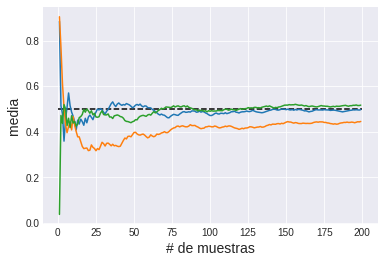

In [14]:
tamaño_muestra = 200
muestras = range(1, tamaño_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tamaño_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tamaño_muestra, linestyle='--', color='k')
plt.ylabel("media", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);

### El teorema central del límite

El teorema central del límite (también llamado teorema del límite central) establece que si tomamos $n$ valores (de forma independiente) de una distribución arbitraria la media $\bar X$ de esos valores se _distribuirá aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right)$$

Donde $\mu$ y $\sigma^2$ son la media y varianza poblacionales.

Para que el teorema del límite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribución
1. La media y la desviación estándar de la distribución tiene que ser finitas

Los criterios 1 y 2 se pueden relajar _bastante_ y aún así obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribución de Cauchy, que no posen media ni varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribución Cauchy no siguen una Gaussiana sino una distribución de Cauchy.

El teorema del límite central explica la prevalencia de la distribución Gaussiana en la naturaleza. Muchos de los fenómenos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, o ser el resultado de la suma de muchos factores diferentes. Además, las Gaussianas son muy comunes en probabilidad, estadística y _machine learning_ ya que que esta familia de distribuciones son más simples de manipular matemáticamente que muchas otras distribuciones.

A continuación vemos una simulación que nos muestra el teorema del límite central en acción.

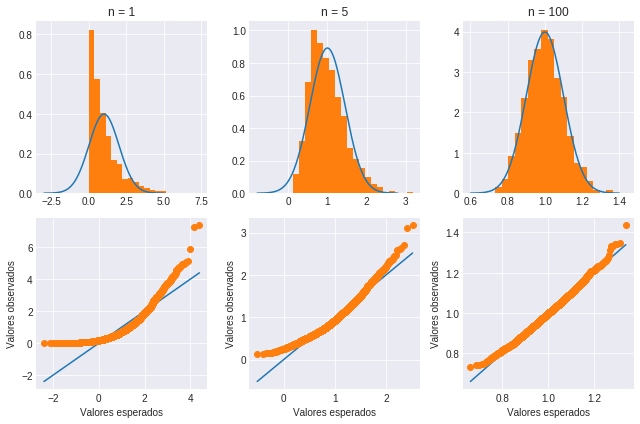

In [16]:
np.random.seed(4)
plt.figure(figsize=(9,6))
iters = 2000
distri = stats.expon(scale=1)
mu, var = distri.stats(moments='mv')

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)
    plt.subplot(2, 3, i+1)
    sd = (var/n)**0.5 
    x = np.linspace(mu - 4 * sd, mu + 4 * sd, 200)
    plt.plot(x, stats.norm(mu, sd).pdf(x))
    plt.hist(sample, density=True, bins=20)
    plt.title('n = {}'.format(n))
    plt.subplot(2, 3, i+4)
    osm, osr = stats.probplot(sample, dist=stats.norm(mu, (var/n)**0.5), fit=False)
    plt.plot(osm, osm)
    plt.plot(osm, osr, 'o')
    plt.xlabel('Valores esperados')
    plt.ylabel('Valores observados')


plt.tight_layout()

## Ejercicios

1. Siguiendo los axiomas de Kolmogorov
    * Por qué la probabilidades no pueden ser mayores a 1? 
1. Según la definición de probabilidad condicional
    * Cual es el valor de $P(A \mid A)$?
    * Cual es la probabilidad de $P(A, B)$?
    * Cual es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * Cuando se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$, cuando?
    * Es posible que $P(A \mid B) < P(A)$, cuando?

 Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
1. Ilustar que la distribución de Poisson se aproxima a una binomial cuando para la binomial $n >> p$.

1. Para alguna de las distribuciones continuas presentadas en esta notebook verificar que la probabilidad total es 1.

1. Para alguna de las distribuciones continuas presentadas en esta notebook verificar que el área bajo la curva es 1.

1. Obtener la cdf a partir de la pdf y obtener la pdf a partir de la cdf. Las funciones `np.cumsum` y `np.diff`, pueden ser de utilidad.

1. Repetir la simulación para la ley de los grandes números para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de paramétros.

1. Repetir la simulación para el teorema del límite central para al menos 3 distribuciones de probabilidad. Para cada distribución probar más de un conjunto de paramétros.

1. Mostrar en un gráfico 2D que la media $\bar X$ converge a $\mu$ y la varianza converge a $\frac{\sigma^2}{n}$ a medida que aumenta el tamaño de la muestra.